## Jacobian of Coordinate Transformation from Cartesian to Spherical

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]]

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

## Set Up

In [2]:
DefManifold[R3, 3, {a, b, c, d, e, f, i, j, k}];

In [3]:
DefChart[sph, R3, {1, 2, 3}, {r[], \[Theta][], \[Phi][]}, ChartColor -> Red];
DefChart[cart, R3, {1, 2, 3}, {x[], y[], z[]}, ChartColor -> Green];

In [5]:
$Assumptions = And[
  (x[] | y[] | z[] | r[] | \[Theta][] | \[Phi][]) \[Element] Reals,
  r[] > 0,
  0 < \[Theta][] < Pi,
  0 <= \[Phi][] < 2 Pi
];

### Coordinate Transoformation

In [6]:
SphInCart = {
  Sqrt[x[]^2 + y[]^2 + z[]^2],
  ArcCos[z[]/Sqrt[x[]^2 + y[]^2 + z[]^2]],
  ArcTan[x[], y[]]
};
CartInSph = r[] {
  Sin[\[Theta][]] Cos[\[Phi][]],
  Sin[\[Theta][]] Sin[\[Phi][]],
  Cos[\[Theta][]]
};

{Cos[ϕ[]] r[] Sin[θ[]],                                 }

 r[] Sin[θ[]] Sin[ϕ[]]          2      2      2
                        Sqrt[x[]  + y[]  + z[] ]
 Cos[θ[]] r[]
                                         z[]
                        ArcCos[------------------------]
                                       2      2      2
                               Sqrt[x[]  + y[]  + z[] ]




                        ArcTan[x[], y[]]
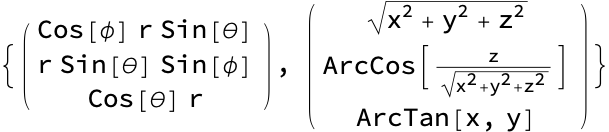

In [8]:
{CartInSph // MatrixForm, SphInCart // MatrixForm}

### Coordinate Transoformation Rule

In [9]:
Cart2SphRules = Thread[{x[], y[], z[]} -> CartInSph];
Sph2CartRules = Thread[{r[], \[Theta][], \[Phi][]} -> SphInCart];

{x[] -> Cos[ϕ[]] r[] Sin[θ[]],                                        }

 y[] -> r[] Sin[θ[]] Sin[ϕ[]]                 2      2      2
                               r[] -> Sqrt[x[]  + y[]  + z[] ]
 z[] -> Cos[θ[]] r[]
                                                       z[]
                               θ[] -> ArcCos[------------------------]
                                                     2      2      2
                                             Sqrt[x[]  + y[]  + z[] ]




                               ϕ[] -> ArcTan[x[], y[]]
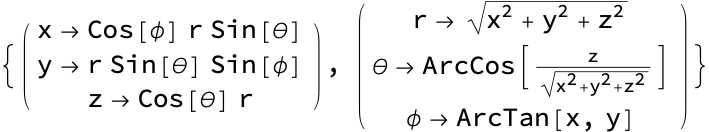

In [11]:
{Cart2SphRules // MatrixForm, Sph2CartRules // MatrixForm}

{x[] -> x[], y[] -> y[], z[] -> z[]}
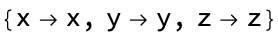

In [12]:
Cart2SphRules /. Sph2CartRules // Simplify

{r[] -> r[], θ[] -> θ[], ϕ[] -> ArcTan[Cos[ϕ[]], Sin[ϕ[]]]}
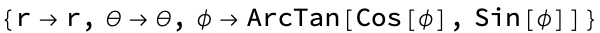

In [13]:
Sph2CartRules /. Cart2SphRules // FullSimplify

In [14]:
JacCart2SphMat = Simplify@Outer[D, SphInCart, {x[], y[], z[]}];
JacSph2CartMat = Simplify@Outer[D, CartInSph, {r[], \[Theta][], \[Phi][]}];

#### Matrix $\frac{\partial r^i}{\partial x^j}$ and $\frac{\partial x^i}{\partial r^j}$

In [16]:
JacSphInCartMat = Simplify@Outer[D, SphInCart, {x[], y[], z[]}];
JacCartInSphMat = Simplify@Outer[D, CartInSph, {r[], \[Theta][], \[Phi][]}];

x[]                                      y[]
------------------------                 ------------------------
        2      2      2                          2      2      2
Sqrt[x[]  + y[]  + z[] ]                 Sqrt[x[]  + y[]  + z[] ]
 

               z[]
     ------------------------
             2      2      2
>    Sqrt[x[]  + y[]  + z[] ]


               x[] z[]                                  y[] z[]
--------------------------------------   --------------------------------------
        2      2      2      2      2            2      2      2      2      2
Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )   Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
 
               2      2
       Sqrt[x[]  + y[] ]
     -(------------------)
          2      2      2
>      x[]  + y[]  + z[]


      y[]                                    x[]
-(-----------)                           -----------
     2      2                               2      2
  x[]  + y[]                             x[]  + y[]
 




>    0
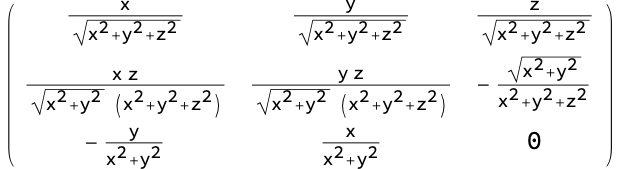

In [18]:
JacSphInCartMat // MatrixForm

Cos[ϕ[]] Sin[θ[]]          Cos[θ[]] Cos[ϕ[]] r[]      -(r[] Sin[θ[]] Sin[ϕ[]])

Sin[θ[]] Sin[ϕ[]]          Cos[θ[]] r[] Sin[ϕ[]]      Cos[ϕ[]] r[] Sin[θ[]]

Cos[θ[]]                   -(r[] Sin[θ[]])            0
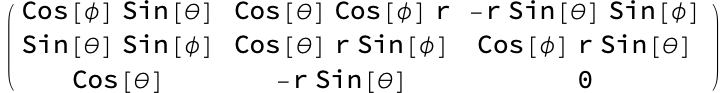

In [19]:
JacCartInSphMat // MatrixForm

### Define Tensors using Components

In [20]:
JacCinS = CTensor[JacCartInSphMat, {cart, -sph}];
JacSinC = CTensor[JacSphInCartMat, {sph, -cart}];

-Image-
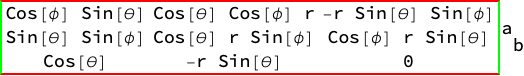

In [22]:
JacCinS[a, -b] // Rasterize

-Image-
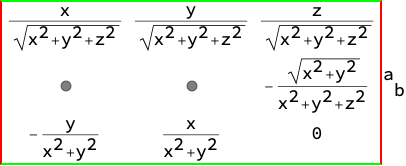

In [23]:
JacSinC[a, -b] // Rasterize

-Image-
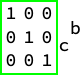

In [24]:
(JacCinS[b, -a] JacSinC[a, -c] /. Cart2SphRules) // Simplify // Rasterize

-Image-
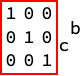

In [25]:
(JacSinC[b, -a] JacCinS[a, -c] /. Cart2SphRules) // Simplify // Rasterize

### Set Basis Transformation

Use SetBasisChange with two arguments. The last argument selects the default coordinate chart. We now also compute derivatives, with respect to the coordinates of that given chart:

In [26]:
SetBasisChange[JacSinC, cart]

In [27]:
(*PrintxCobaCache[]*)

## Jacobians

### WriteToC Rules

In [28]:
CartToCRules = {
    x[]^2 + y[]^2 + z[]^2 -> r^2,
    x[]^2 + y[]^2 -> rh^2,
    x[] -> x, y[] -> y, z[] -> z
};
SphToCRules = {
    r[] -> r,
    Sin[\[Theta][]] -> st, Cos[\[Theta][]] -> ct, Sin[\[Phi][]] -> sp, Cos[\[Phi][]] -> cp,
    Csc[\[Theta][]] -> st^-1,
    Sin[2 \[Theta][]] -> s2t, Cos[2 \[Theta][]] -> c2t, Sin[2 \[Phi][]] -> s2p, Cos[2 \[Phi][]] -> c2p,
    Cot[\[Theta][]] -> cott
};

In [30]:
PowerToCRules = Module[{validSymbols = {r, rh, x, y, z, st, ct, sp, cp}},
    {base_Symbol^(n_Integer) /; MemberQ[validSymbols, base] :>
        If[n > 0,
            Symbol[SymbolName[base] <> ToString[n]],
            If[n == -1, Symbol[SymbolName[base] <> "Inv"], Symbol[SymbolName[base] <> "Inv" <> ToString[-n]]]]}];

### Jacobian $\frac{\partial r^i}{\partial x^j}$

#### Expressed in Cartesian Coordinates

x[]                                      y[]
------------------------                 ------------------------
        2      2      2                          2      2      2
Sqrt[x[]  + y[]  + z[] ]                 Sqrt[x[]  + y[]  + z[] ]
 

               z[]
     ------------------------
             2      2      2
>    Sqrt[x[]  + y[]  + z[] ]


               x[] z[]                                  y[] z[]
--------------------------------------   --------------------------------------
        2      2      2      2      2            2      2      2      2      2
Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )   Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
 
               2      2
       Sqrt[x[]  + y[] ]
     -(------------------)
          2      2      2
>      x[]  + y[]  + z[]


      y[]                                    x[]
-(-----------)                           -----------
     2      2                               2      2
  x[]  + y[]                             x[]  + y[]
 




>    0
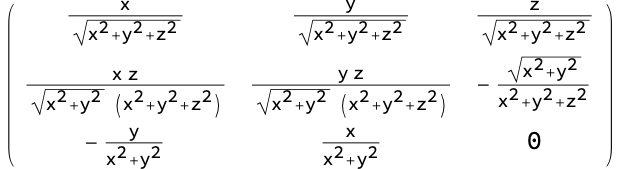

In [31]:
Table[JacSinC[{ii, sph}, {jj, -cart}], {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

x        y        z
-        -        -
r        r        r

 x z      y z       rh
-----    -----    -(--)
 2        2          2
r  rh    r  rh      r

   y      x
-(---)   ---
    2      2
  rh     rh       0
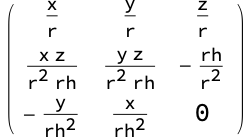

In [32]:
Table[Refine[JacSinC[{ii, sph}, {jj, -cart}] /. CartToCRules, {r > 0, rh > 0}], {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

rInv x            rInv y            rInv z

rhInv rInv2 x z   rhInv rInv2 y z   -(rh rInv2)

-(rhInv2 y)       rhInv2 x          0
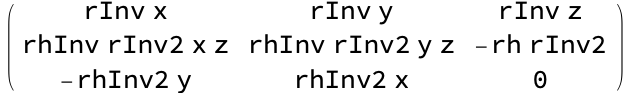

In [33]:
Table[Refine[JacSinC[{ii, sph}, {jj, -cart}] /. CartToCRules, {r > 0, rh > 0}] /. PowerToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

#### Expressed in Spherical Coordinates

Cos[ϕ[]] Sin[θ[]]      Sin[θ[]] Sin[ϕ[]]      Cos[θ[]]

Cos[θ[]] Cos[ϕ[]]      Cos[θ[]] Sin[ϕ[]]        Sin[θ[]]
-----------------      -----------------      -(--------)
       r[]                    r[]                 r[]

  Csc[θ[]] Sin[ϕ[]]    Cos[ϕ[]] Csc[θ[]]
-(-----------------)   -----------------
         r[]                  r[]             0
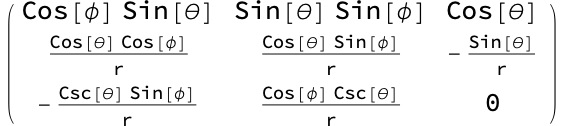

In [34]:
Table[(JacSinC[{ii, sph}, {jj, -cart}] /. Cart2SphRules // FullSimplify), {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

cp st     sp st     ct

cp ct     ct sp       st
-----     -----     -(--)
  r         r         r

   sp      cp
-(----)   ----
  r st    r st      0
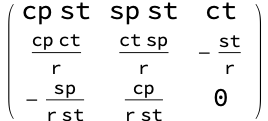

In [35]:
Table[(JacSinC[{ii, sph}, {jj, -cart}] /. Cart2SphRules // FullSimplify) /. SphToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

cp st              sp st              ct

cp ct rInv         ct rInv sp         -(rInv st)

-(rInv sp stInv)   cp rInv stInv      0
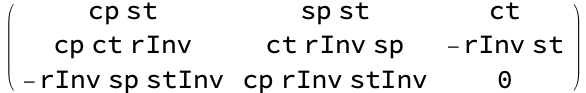

In [36]:
Table[(JacSinC[{ii, sph}, {jj, -cart}] /. Cart2SphRules // FullSimplify) /. SphToCRules /. PowerToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

### Derivative of Jacobian $\frac{\partial^2r^i}{\partial x^j \partial x^k}$

#### Expressed in Cartesian Coordinates

2      2
      y[]  + z[]
-----------------------
    2      2      2 3/2
(x[]  + y[]  + z[] )
 

               x[] y[]
     -(-----------------------)
           2      2      2 3/2
>      (x[]  + y[]  + z[] )
 

               x[] z[]
     -(-----------------------)
           2      2      2 3/2
>      (x[]  + y[]  + z[] )

           4      2    2      4      2    2
z[] (-2 x[]  - x[]  y[]  + y[]  + y[]  z[] )
--------------------------------------------
       2      2 3/2     2      2      2 2
   (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                          2        2      2
        x[] y[] z[] (3 x[]  + 3 y[]  + z[] )
     -(--------------------------------------)
           2      2 3/2     2      2      2 2
>      (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                    2      2      2
            x[] (x[]  + y[]  - z[] )
     ---------------------------------------
             2      2      2      2      2 2
>    Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )


  2 x[] y[]
--------------
    2      2 2
(x[]  + y[] )
 
          2      2
      -x[]  + y[]
     --------------
         2      2 2
>    (x[]  + y[] )
 




>    0

                                                     2      2
          x[] y[]                                 x[]  + z[]
-(-----------------------)                  -----------------------
      2      2      2 3/2                       2      2      2 3/2
  (x[]  + y[]  + z[] )                      (x[]  + y[]  + z[] )
 

                  y[] z[]
        -(-----------------------)
              2      2      2 3/2
>         (x[]  + y[]  + z[] )

                     2        2      2              4        4      2      2      2
   x[] y[] z[] (3 x[]  + 3 y[]  + z[] )     z[] (x[]  - 2 y[]  + x[]  (-y[]  + z[] ))
-(--------------------------------------)   -----------------------------------------
      2      2 3/2     2      2      2 2         2      2 3/2     2      2      2 2
  (x[]  + y[] )    (x[]  + y[]  + z[] )      (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                       2      2      2
               y[] (x[]  + y[]  - z[] )
        ---------------------------------------
                2      2      2      2      2 2
>       Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )

     2      2
 -x[]  + y[]                                  -2 x[] y[]
--------------                              --------------
    2      2 2                                  2      2 2
(x[]  + y[] )                               (x[]  + y[] )
 




>       0


          x[] z[]                                   y[] z[]
-(-----------------------)                -(-----------------------)
      2      2      2 3/2                       2      2      2 3/2
  (x[]  + y[]  + z[] )                      (x[]  + y[]  + z[] )
 
              2      2
           x[]  + y[]
     -----------------------
         2      2      2 3/2
>    (x[]  + y[]  + z[] )

               2      2      2                           2      2      2
       x[] (x[]  + y[]  - z[] )                  y[] (x[]  + y[]  - z[] )
---------------------------------------   ---------------------------------------
        2      2      2      2      2 2           2      2      2      2      2 2
Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )    Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
 
               2      2
     2 Sqrt[x[]  + y[] ] z[]
     -----------------------
          2      2      2 2
>     (x[]  + y[]  + z[] )





0                                         0
 




>    0
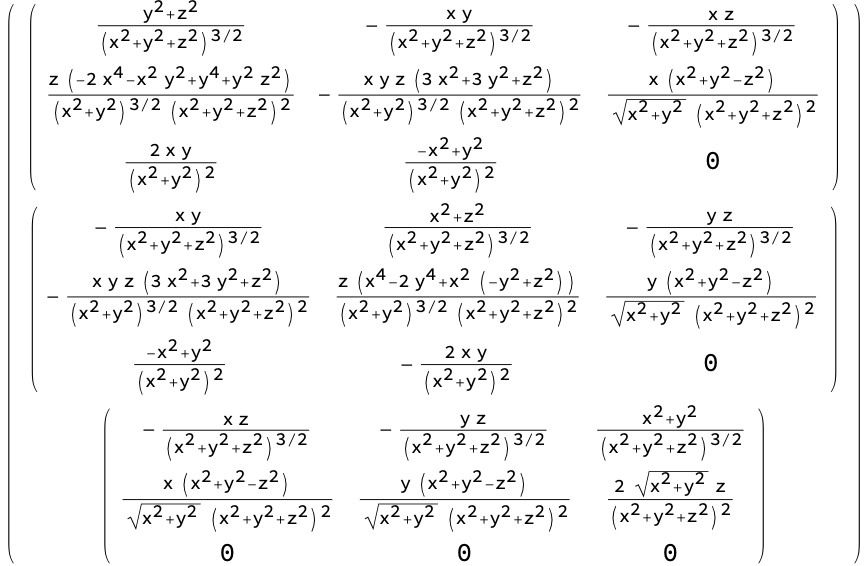

In [37]:
Table[Table[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] // Simplify), {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm

2    2
y  + z                             x y
-------                          -(---)
   3                                3
  r                                r
 

       x z
     -(---)
        3
>      r

       4    2  2    4    2  2                2      2    2
z (-2 x  - x  y  + y  + y  z )     x y z (3 x  + 3 y  + z )
------------------------------   -(------------------------)
             4   3                           4   3
            r  rh                           r  rh
 
          2    2
     x (rh  - z )
     ------------
         4
>       r  rh

                                   2    2
2 x y                            -x  + y
-----                            --------
   4                                 4
 rh                                rh
 




>    0

                                 2    2
  x y                           x  + z
-(---)                          -------
   3                               3
  r                               r
 

       y z
     -(---)
        3
>      r

            2      2    2           4      4    2    2    2
  x y z (3 x  + 3 y  + z )      z (x  - 2 y  + x  (-y  + z ))
-(------------------------)     -----------------------------
            4   3                           4   3
           r  rh                           r  rh
 
          2    2
     y (rh  - z )
     ------------
         4
>       r  rh

  2    2
-x  + y                         -2 x y
--------                        ------
    4                              4
  rh                             rh
 




>    0

                                2
  x z            y z          rh
-(---)         -(---)         ---
   3              3            3
  r              r            r

     2    2         2    2
x (rh  - z )   y (rh  - z )   2 rh z
------------   ------------   ------
    4              4             4
   r  rh          r  rh         r





0              0              0
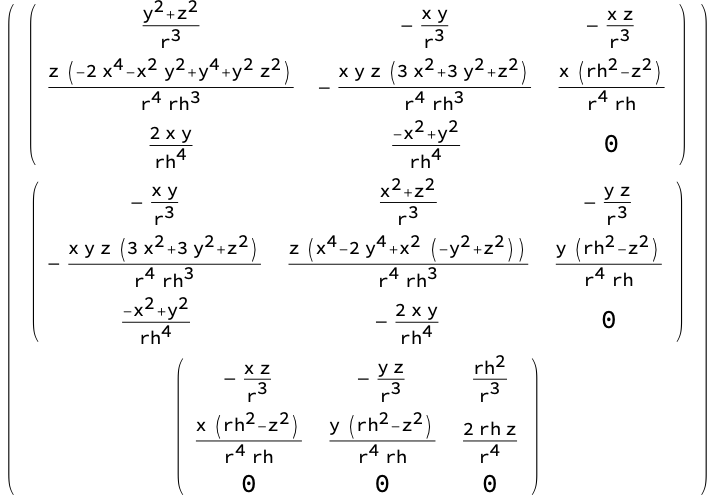

In [38]:
Table[Table[Refine[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] // Simplify) /. CartToCRules, {r > 0, rh > 0}] /. CartToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm

rInv3 (y2 + z2)
 
>    -(rInv3 x y)
 
>    -(rInv3 x z)

rhInv3 rInv4 z (-2 x4 - x2 y2 + y4 + y2 z2)
 
>    -(rhInv3 rInv4 x y z (3 x2 + 3 y2 + z2))
 
>    rhInv rInv4 x (rh2 - z2)

2 rhInv4 x y
 
>    rhInv4 (-x2 + y2)
 
>    0

-(rInv3 x y)
 
>    rInv3 (x2 + z2)
 
>    -(rInv3 y z)

-(rhInv3 rInv4 x y z (3 x2 + 3 y2 + z2))     rhInv3 rInv4 z 
 
>    (x4 - 2 y4 + x2 (-y2 + z2))   rhInv rInv4 y (rh2 - z2)

rhInv4 (-x2 + y2)
 
>    -2 rhInv4 x y
 
>    0

-(rInv3 x z)               -(rInv3 y z)               rh2 rInv3

rhInv rInv4 x (rh2 - z2)   rhInv rInv4 y (rh2 - z2)   2 rh rInv4 z

0                          0                          0
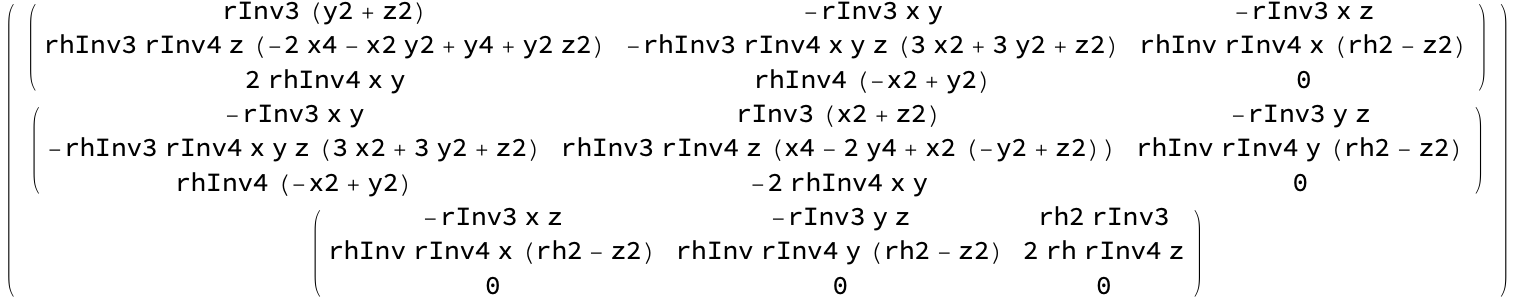

In [39]:
Table[Table[Refine[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] // Simplify) /. CartToCRules, {r > 0, rh > 0}] /. CartToCRules /. PowerToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm

#### Expressed in Spherical Coordinates

2           2         2
Cos[θ[]]  + Sin[θ[]]  Sin[ϕ[]]
-------------------------------
              r[]
 

                        2
       Cos[ϕ[]] Sin[θ[]]  Sin[ϕ[]]
     -(---------------------------)
>                  r[]
 


       Cos[θ[]] Cos[ϕ[]] Sin[θ[]]
     -(--------------------------)
>                 r[]

                    2
(Cos[2 θ[]] Cos[ϕ[]]  - Cos[2 ϕ[]]) Cot[θ[]]
--------------------------------------------
                       2
                    r[]
 

     (-2 + Cos[2 θ[]]) Cot[θ[]] Sin[2 ϕ[]]
     -------------------------------------
                         2
>                   2 r[]
 

       Cos[2 θ[]] Cos[ϕ[]]
     -(-------------------)
                 2
>             r[]

        2
Csc[θ[]]  Sin[2 ϕ[]]
--------------------
           2
        r[]
 
                          2
       Cos[2 ϕ[]] Csc[θ[]]
     -(--------------------)
                  2
>              r[]
 




>    0


                   2
  Cos[ϕ[]] Sin[θ[]]  Sin[ϕ[]]
-(---------------------------)
              r[]
 

             2           2         2
     Cos[θ[]]  + Cos[ϕ[]]  Sin[θ[]]
     -------------------------------
>                  r[]
 


       Cos[θ[]] Sin[θ[]] Sin[ϕ[]]
     -(--------------------------)
>                 r[]


(-2 + Cos[2 θ[]]) Cot[θ[]] Sin[2 ϕ[]]
-------------------------------------
                    2
               2 r[]
 
                                               2
     Cot[θ[]] (Cos[2 ϕ[]] + Cos[2 θ[]] Sin[ϕ[]] )
     --------------------------------------------
                            2
>                        r[]
 

       Cos[2 θ[]] Sin[ϕ[]]
     -(-------------------)
                 2
>             r[]

                     2
  Cos[2 ϕ[]] Csc[θ[]]
-(--------------------)
             2
          r[]
 
               2
       Csc[θ[]]  Sin[2 ϕ[]]
     -(--------------------)
                  2
>              r[]
 




>    0


  Cos[θ[]] Cos[ϕ[]] Sin[θ[]]      Cos[θ[]] Sin[θ[]] Sin[ϕ[]]
-(--------------------------)   -(--------------------------)
             r[]                             r[]
 
             2
     Sin[θ[]]
     ---------
>       r[]

  Cos[2 θ[]] Cos[ϕ[]]             Cos[2 θ[]] Sin[ϕ[]]
-(-------------------)          -(-------------------)
            2                               2
         r[]                             r[]
 
     Sin[2 θ[]]
     ----------
           2
>       r[]




0                               0
 



>    0
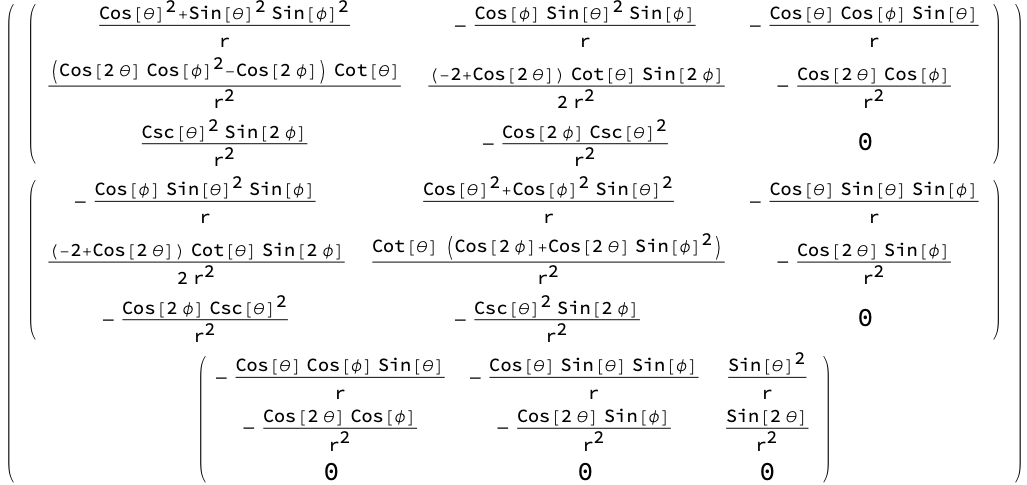

In [40]:
Table[Table[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] /. Cart2SphRules // FullSimplify), {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm

2     2   2                     2
ct  + sp  st              cp sp st                cp ct st
-------------           -(---------)            -(--------)
      r                       r                      r

                   2
cott (-c2p + c2t cp )   (-2 + c2t) cott s2p       c2t cp
---------------------   -------------------     -(------)
          2                       2                  2
         r                     2 r                  r


 s2p                       c2p
------                  -(------)
 2   2                     2   2
r  st                     r  st                 0


          2              2     2   2
  cp sp st             ct  + cp  st             ct sp st
-(---------)           -------------          -(--------)
      r                      r                     r

                                         2
(-2 + c2t) cott s2p    cott (c2p + c2t sp )     c2t sp
-------------------    --------------------   -(------)
          2                      2                 2
       2 r                      r                 r


   c2p                    s2p
-(------)              -(------)
   2   2                  2   2
  r  st                  r  st                0




                              2
  cp ct st      ct sp st    st
-(--------)   -(--------)   ---
     r             r         r

  c2t cp        c2t sp      s2t
-(------)     -(------)     ---
     2             2         2
    r             r         r




0             0             0
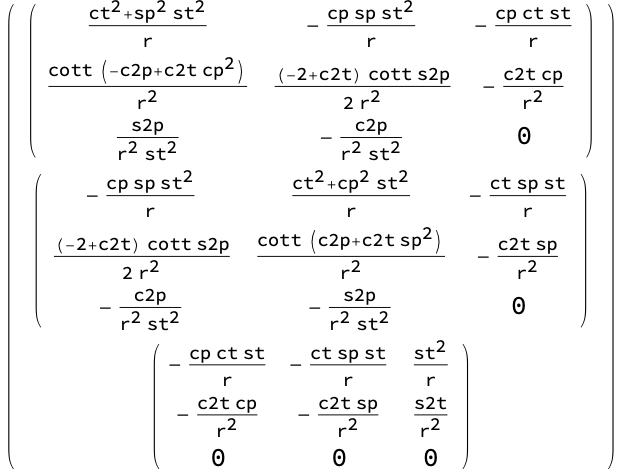

In [41]:
Table[Table[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] /. Cart2SphRules // FullSimplify) /. SphToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm

rInv (ct2 + sp2 st2)          -(cp rInv sp st2)             -(cp ct rInv st)

                              (-2 + c2t) cott rInv2 s2p
                              -------------------------
cott (-c2p + c2t cp2) rInv2               2                 -(c2t cp rInv2)



rInv2 s2p stInv2              -(c2p rInv2 stInv2)           0



-(cp rInv sp st2)            rInv (ct2 + cp2 st2)         -(ct rInv sp st)

(-2 + c2t) cott rInv2 s2p
-------------------------
            2                cott rInv2 (c2p + c2t sp2)   -(c2t rInv2 sp)



-(c2p rInv2 stInv2)          -(rInv2 s2p stInv2)          0







-(cp ct rInv st)   -(ct rInv sp st)   rInv st2

-(c2t cp rInv2)    -(c2t rInv2 sp)    rInv2 s2t

0                  0                  0
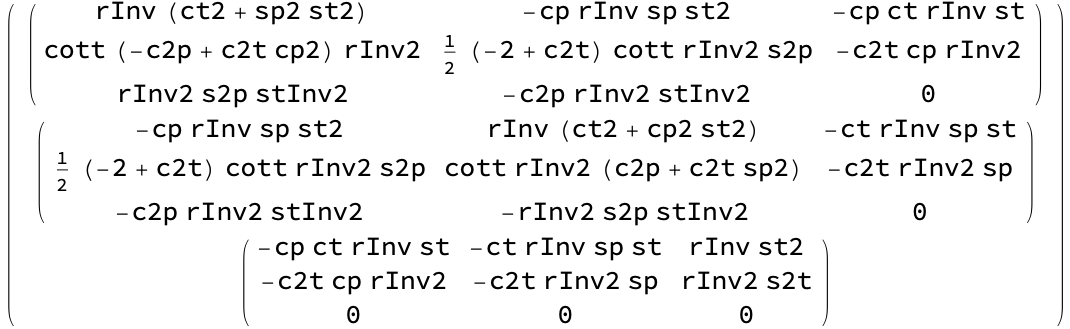

In [42]:
Table[Table[(PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]] /. Cart2SphRules // FullSimplify) /. SphToCRules /. PowerToCRules, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm, {kk, 1, 3}] // MatrixForm